## Telecom_Customer_Churn_Analysis




## Problem Statement : 
In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!					
					

## Objective:

To classify the potential churn customers based on numerical and categorical features.

## Dataset Attributes
    customerID : Customer ID
    gender : Whether the customer is a male or a female
    SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    Partner : Whether the customer has a partner or not (Yes, No)
    Dependents : Whether the customer has dependents or not (Yes, No)
    tenure : Number of months the customer has stayed with the company
    PhoneService : Whether the customer has a phone service or not (Yes, No)
    MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
    OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
    DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
    TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
    StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
    StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
    Contract : The contract term of the customer (Month-to-month, One year, Two year)
    PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    MonthlyCharges : The amount charged to the customer monthly
    TotalCharges : The total amount charged to the customer
    Churn : Whether the customer churned or not (Yes or No)

## Importing  basic the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
#pd.options.display.float_format = '{:,2f}'.format


In [2]:
## Loadind the dataset

df = pd.read_csv("C:\\Users\\Hi\\Downloads\\Telco-Customer-Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print("Total no.of rows:",df.shape[0])
print("Total no.of columns:",df.shape[1])

Total no.of rows: 7043
Total no.of columns: 21


In [ ]:
# Data preprocessing

1.Handling missing values
2.encoding


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print("*******************************")
print("Columns\t\tMissing values")
print("*******************************")
print(df.isnull().sum())
print("*******************************")
print(df.isnull().sum().sum())

*******************************
Columns		Missing values
*******************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
*******************************
0


<Axes: >

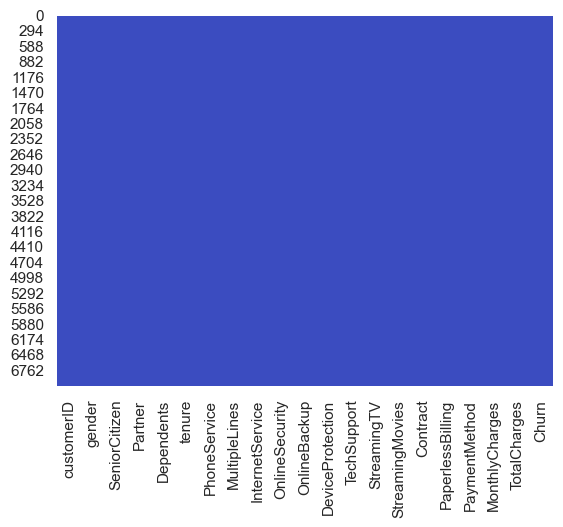

In [8]:
sns.heatmap(df.isnull(),cmap = "coolwarm",cbar = False)

In [9]:
print("*******************************")
print("Columns\t\tdtype")
print("*******************************")
print(df.dtypes)
print("*******************************")

*******************************
Columns		dtype
*******************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
*******************************


In [10]:
df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [11]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [13]:
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [14]:
# dropping the null values containing rows

df = df[df['TotalCharges'].notnull()]

In [15]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [16]:
df.shape

(7032, 21)

In [17]:
df = df.drop('customerID',axis = 1)

In [18]:
df1 = df.copy()

In [19]:
num_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']

print("******************NUMERICAL FEATURES**************************")
print()
print(num_features)
print()

categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

print("******************CATEGORICAL FEATURES**************************")
print()
print(categorical_features)


******************NUMERICAL FEATURES**************************

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

******************CATEGORICAL FEATURES**************************

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
print("*****************************************************************")
print("\t\tLabel Encoder Transformation")
print("******************************************************************")
for i in categorical_features:
    df1[i] = le.fit_transform(df1[i])
    print(i ,":",df1[i].unique(), "=" ,le.inverse_transform(df1[i].unique()))
print("*******************************************************************")    

*****************************************************************
		Label Encoder Transformation
******************************************************************
gender : [0 1] = ['Female' 'Male']
Partner : [1 0] = ['Yes' 'No']
Dependents : [0 1] = ['No' 'Yes']
PhoneService : [0 1] = ['No' 'Yes']
MultipleLines : [1 0 2] = ['No phone service' 'No' 'Yes']
InternetService : [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 2 1] = ['No' 'Yes' 'No internet service']
OnlineBackup : [2 0 1] = ['Yes' 'No' 'No internet service']
DeviceProtection : [0 2 1] = ['No' 'Yes' 'No internet service']
TechSupport : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingTV : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingMovies : [0 2 1] = ['No' 'Yes' 'No internet service']
Contract : [0 1 2] = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0] = ['Yes' 'No']
PaymentMethod : [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

In [23]:
## Desriptive statistics

df1.describe().T

count         mean          std    min       25%       50%  \
gender            7032.0     0.504693     0.500014   0.00    0.0000     1.000   
SeniorCitizen     7032.0     0.162400     0.368844   0.00    0.0000     0.000   
Partner           7032.0     0.482509     0.499729   0.00    0.0000     0.000   
Dependents        7032.0     0.298493     0.457629   0.00    0.0000     0.000   
tenure            7032.0    32.421786    24.545260   1.00    9.0000    29.000   
PhoneService      7032.0     0.903299     0.295571   0.00    1.0000     1.000   
MultipleLines     7032.0     0.940557     0.948627   0.00    0.0000     1.000   
InternetService   7032.0     0.872582     0.737271   0.00    0.0000     1.000   
OnlineSecurity    7032.0     0.789249     0.859962   0.00    0.0000     1.000   
OnlineBackup      7032.0     0.905859     0.880394   0.00    0.0000     1.000   
DeviceProtection  7032.0     0.903868     0.880178   0.00    0.0000     1.000   
TechSupport       7032.0     0.796359     0.861674   0.00    0.0000     1.000   
StreamingTV       7032.0     0.984926     0.885285   0.00    0.0000     1.000   
StreamingMovies   7032.0     0.992890     0.885385   0.00    0.0000     1.000   
Contract          7032.0     0.688567     0.832934   0.00    0.0000     0.000   
PaperlessBilling  7032.0     0.592719     0.491363   0.00    0.0000     1.000   
PaymentMethod     7032.0     1.573237     1.067504   0.00    1.0000     2.000   
MonthlyCharges    7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges      7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   
Churn             7032.0     0.265785     0.441782   0.00    0.0000     0.000   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              55.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        2.0000     2.00  
InternetService      1.0000     2.00  
OnlineSecurity       2.0000     2.00  
OnlineBackup         2.0000     2.00  
DeviceProtection     2.0000     2.00  
TechSupport          2.0000     2.00  
StreamingTV          2.0000     2.00  
StreamingMovies      2.0000     2.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        2.0000     3.00  
MonthlyCharges      89.8625   118.75  
TotalCharges      3794.7375  8684.80  
Churn                1.0000     1.00

In [24]:
df1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Not Churned Customer')

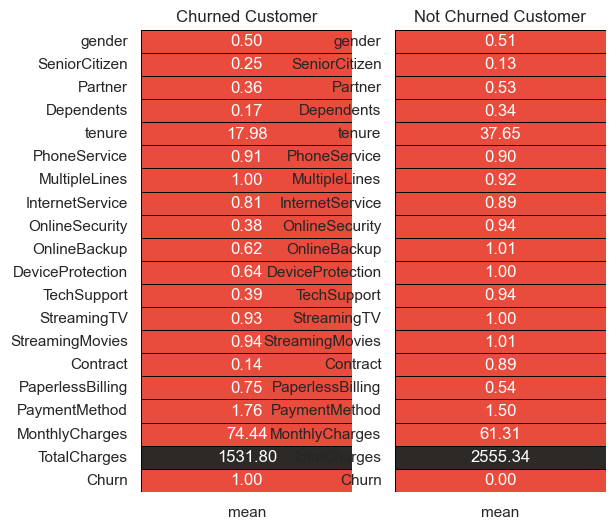

In [25]:
colors = ['#E94B3C', '#2D2926']

churn = df1[df1['Churn']==1].describe().T
not_churn = df1[df1['Churn']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Churned Customer')

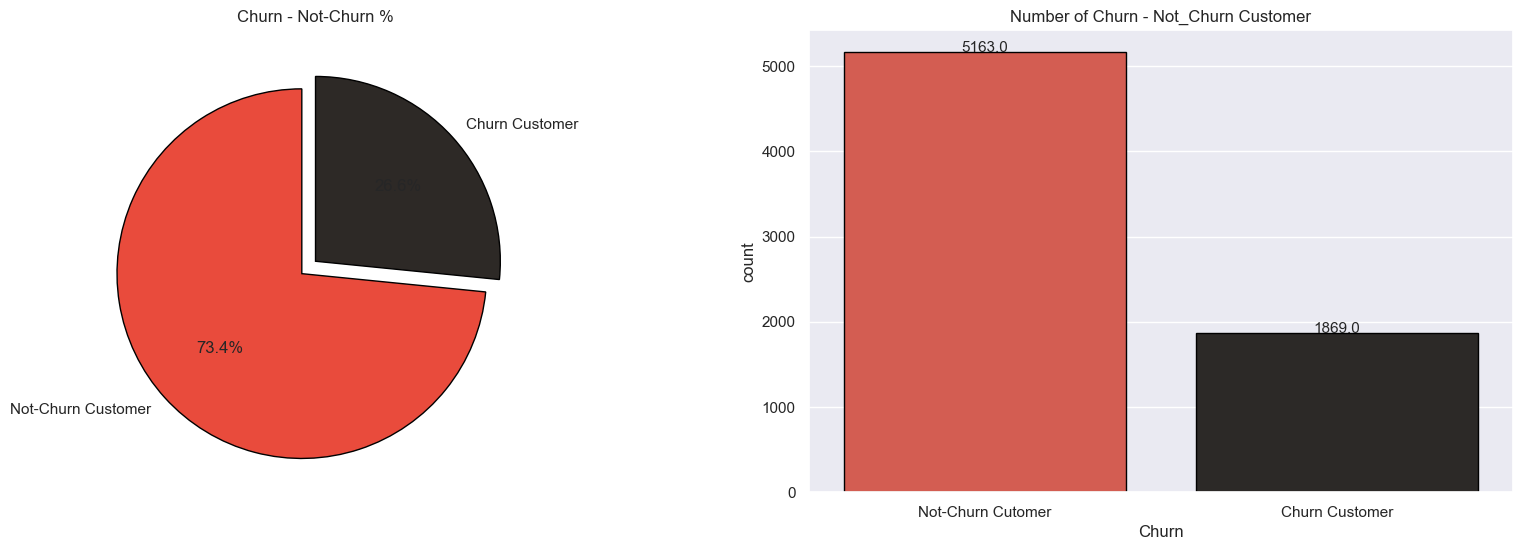

In [26]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-Churn Customer', 'Churn Customer'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black', 
                                                           'linewidth':1, 'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)

ax = sns.countplot(x='Churn', data = df1, palette = colors, edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Not-Churn Cutomer', 'Churn Customer'])

plt.title('Number of Churn - Not_Churn Customer');
plt.show()    

In [27]:
# Case 1 : Customer information
# Case 2 : Payment information 
# Case 3 : Service Subscribed

In [28]:
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
l3 = ['Contract',  'PaperlessBilling',  'PaymentMethod']

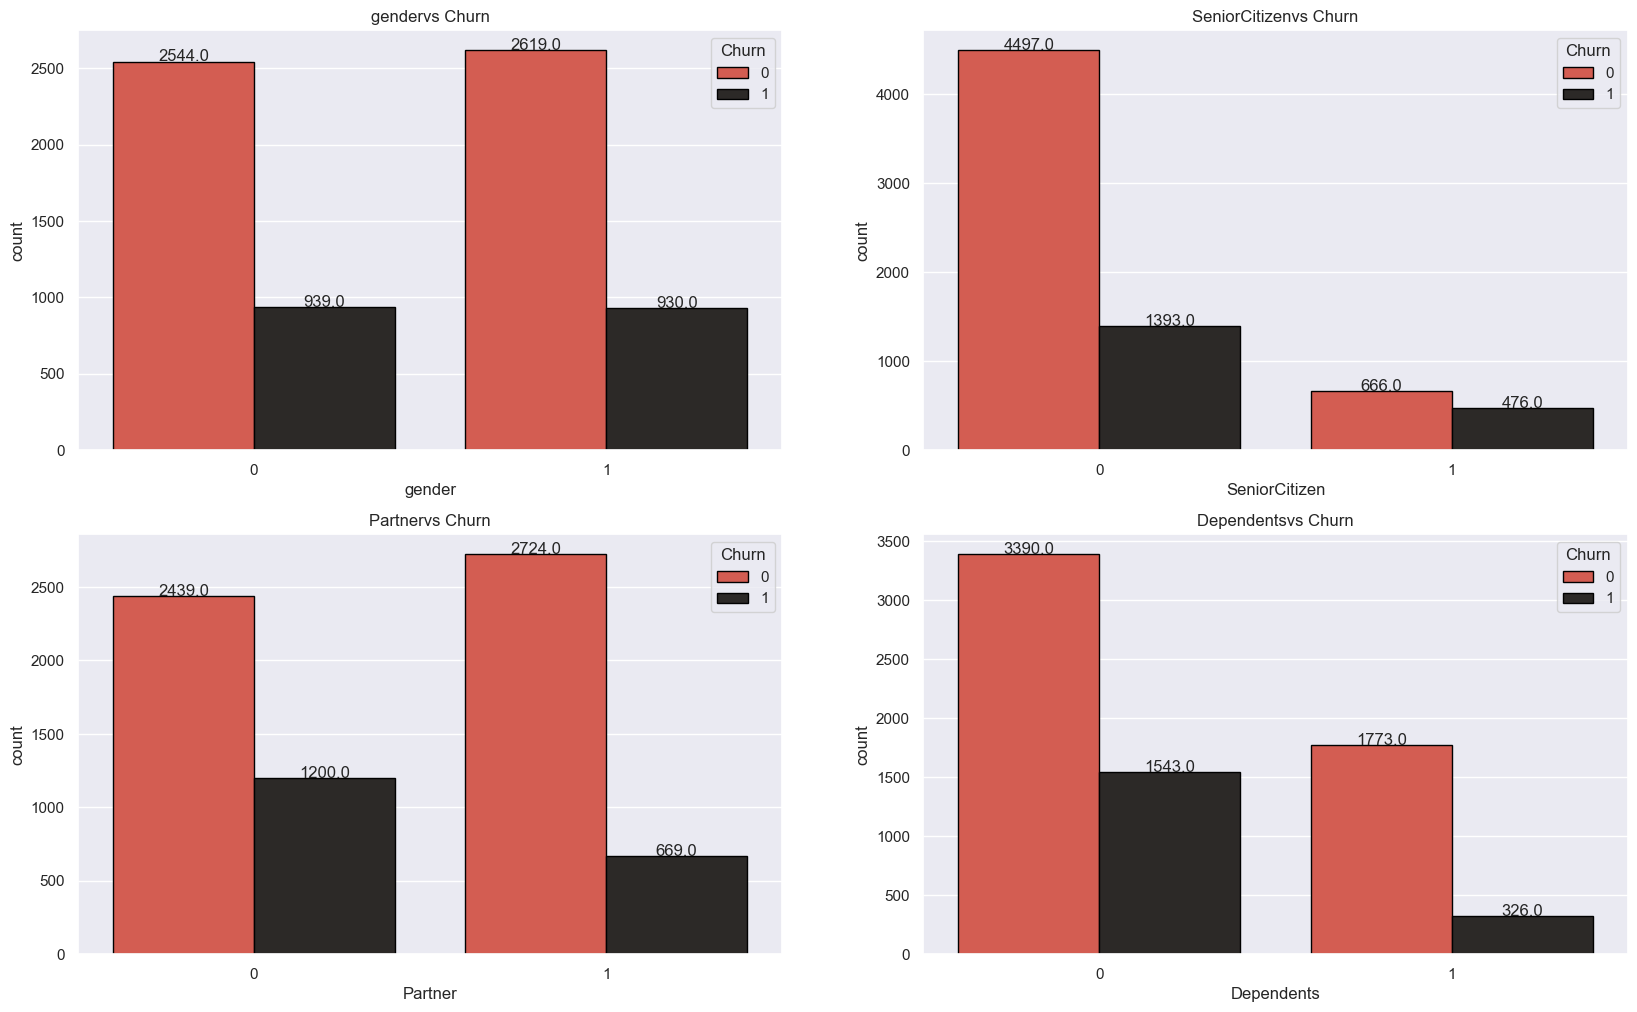

In [29]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i], data=df1, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + 'vs Churn'
        plt.title(title);

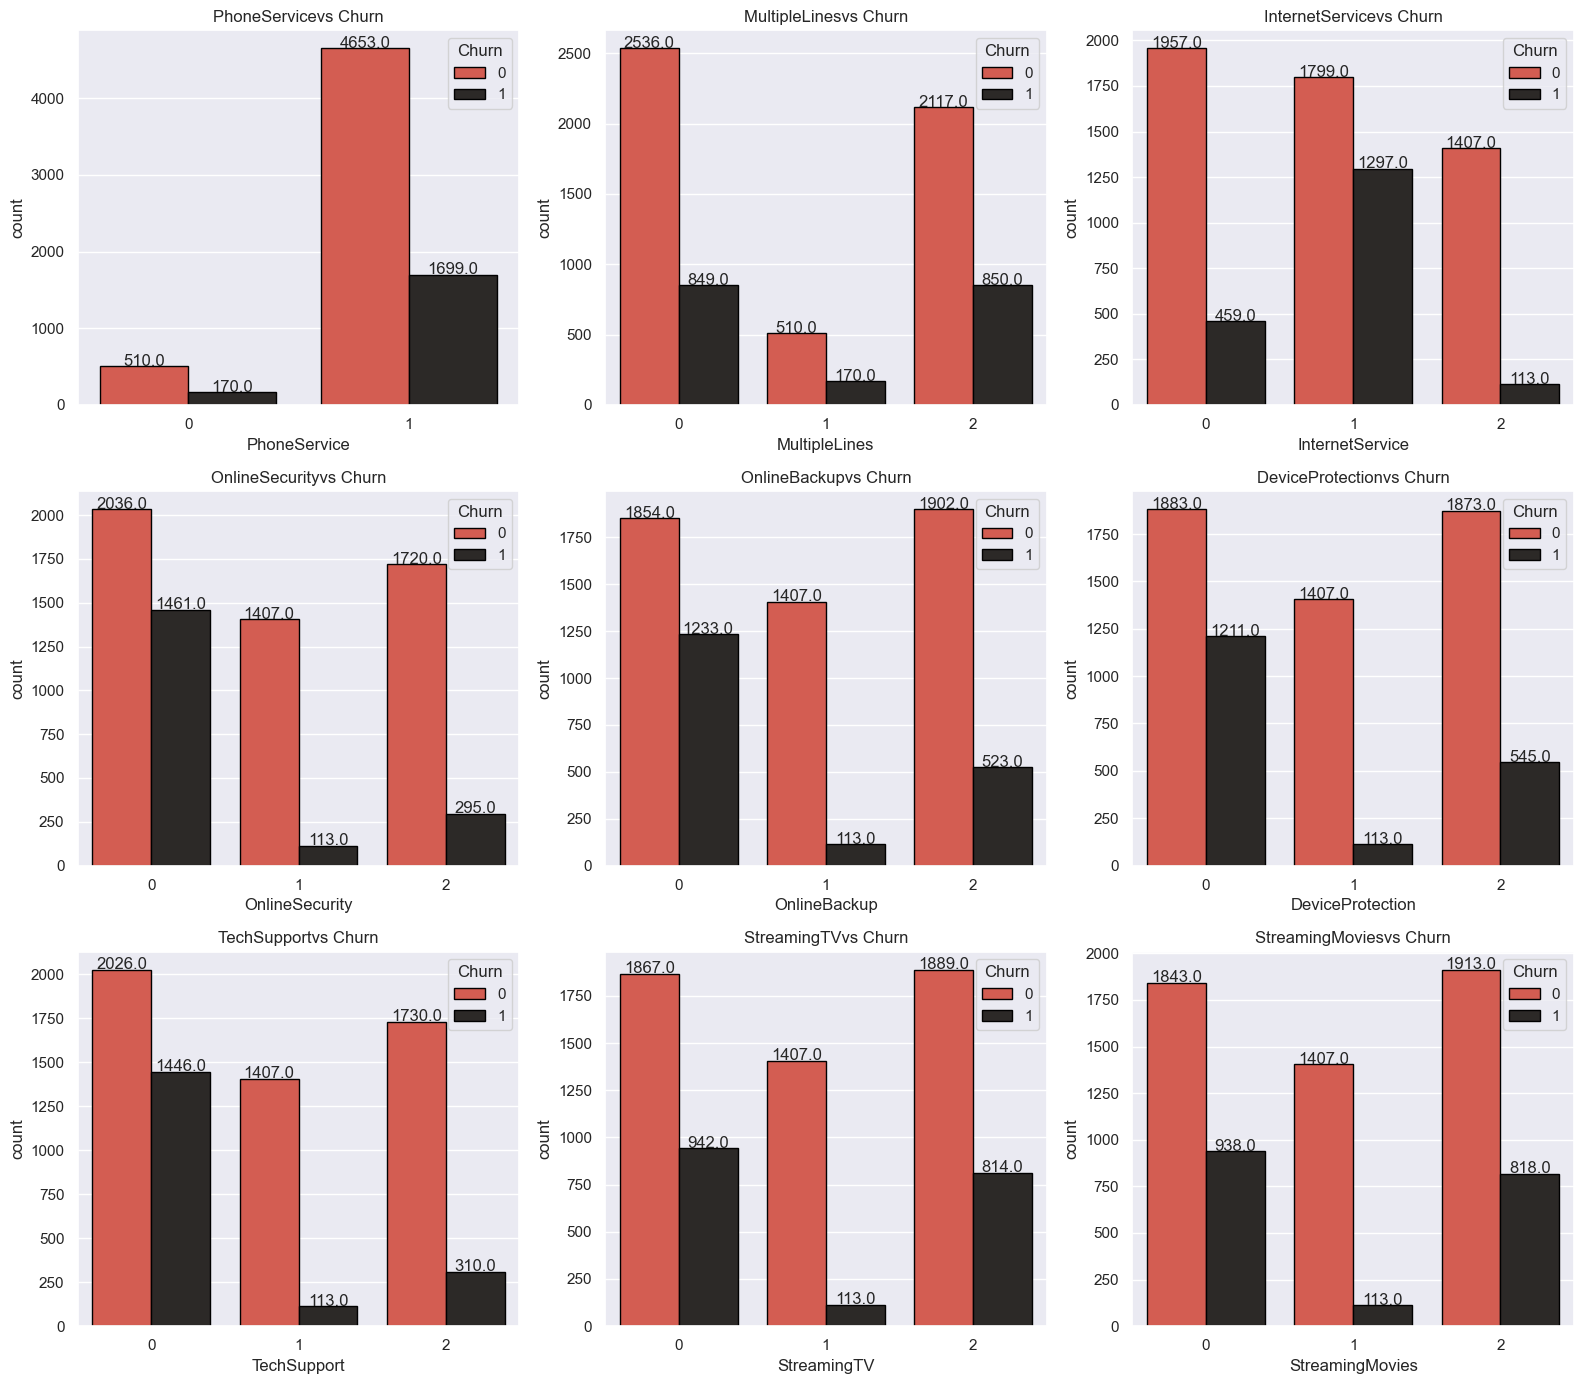

In [30]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l2[i], data=df1, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l2[i] + 'vs Churn'
        plt.title(title)
        plt.tight_layout();

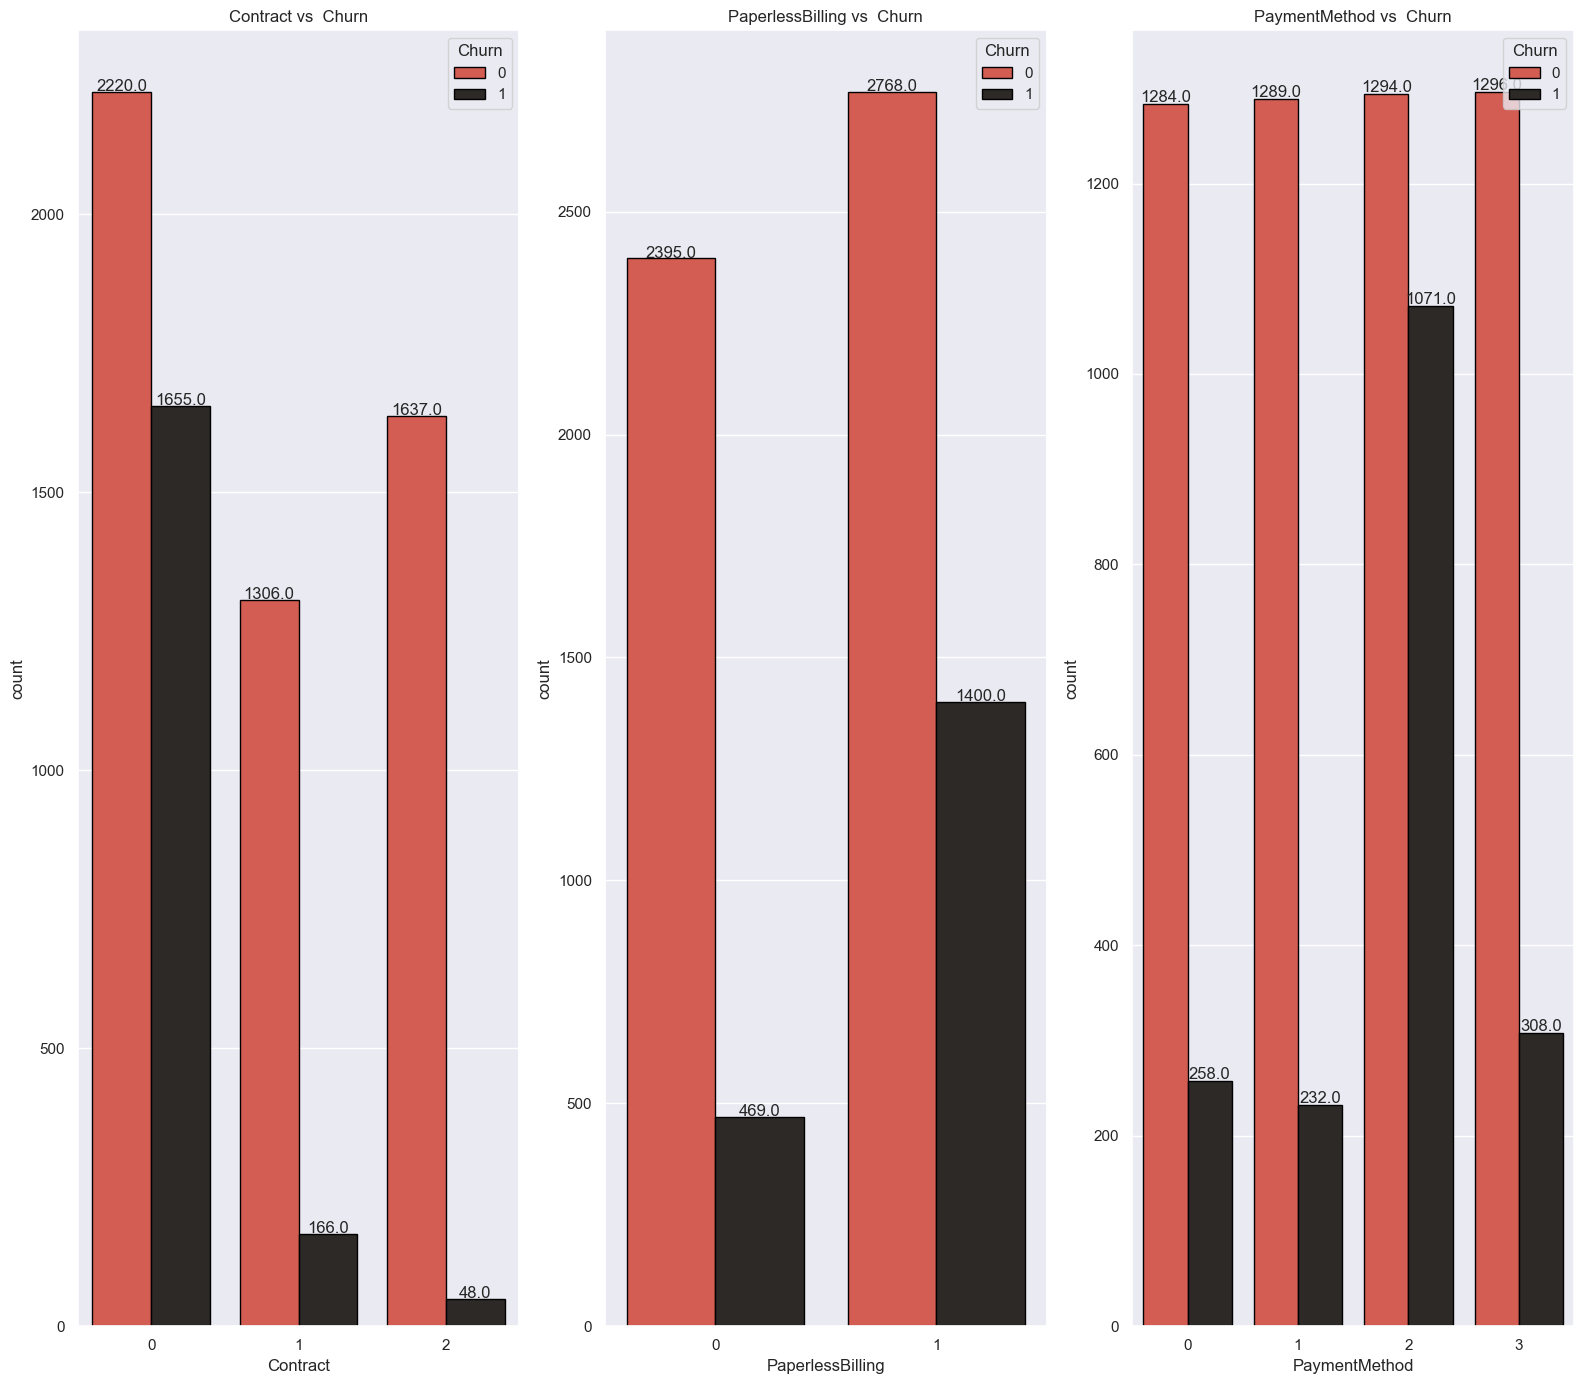

In [31]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l3[0:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l3[i], data=df1, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + ' vs  Churn'
        plt.title(title)
        plt.tight_layout();

In [32]:
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [35]:
categorical_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
 'PaymentMethod', 'Churn']

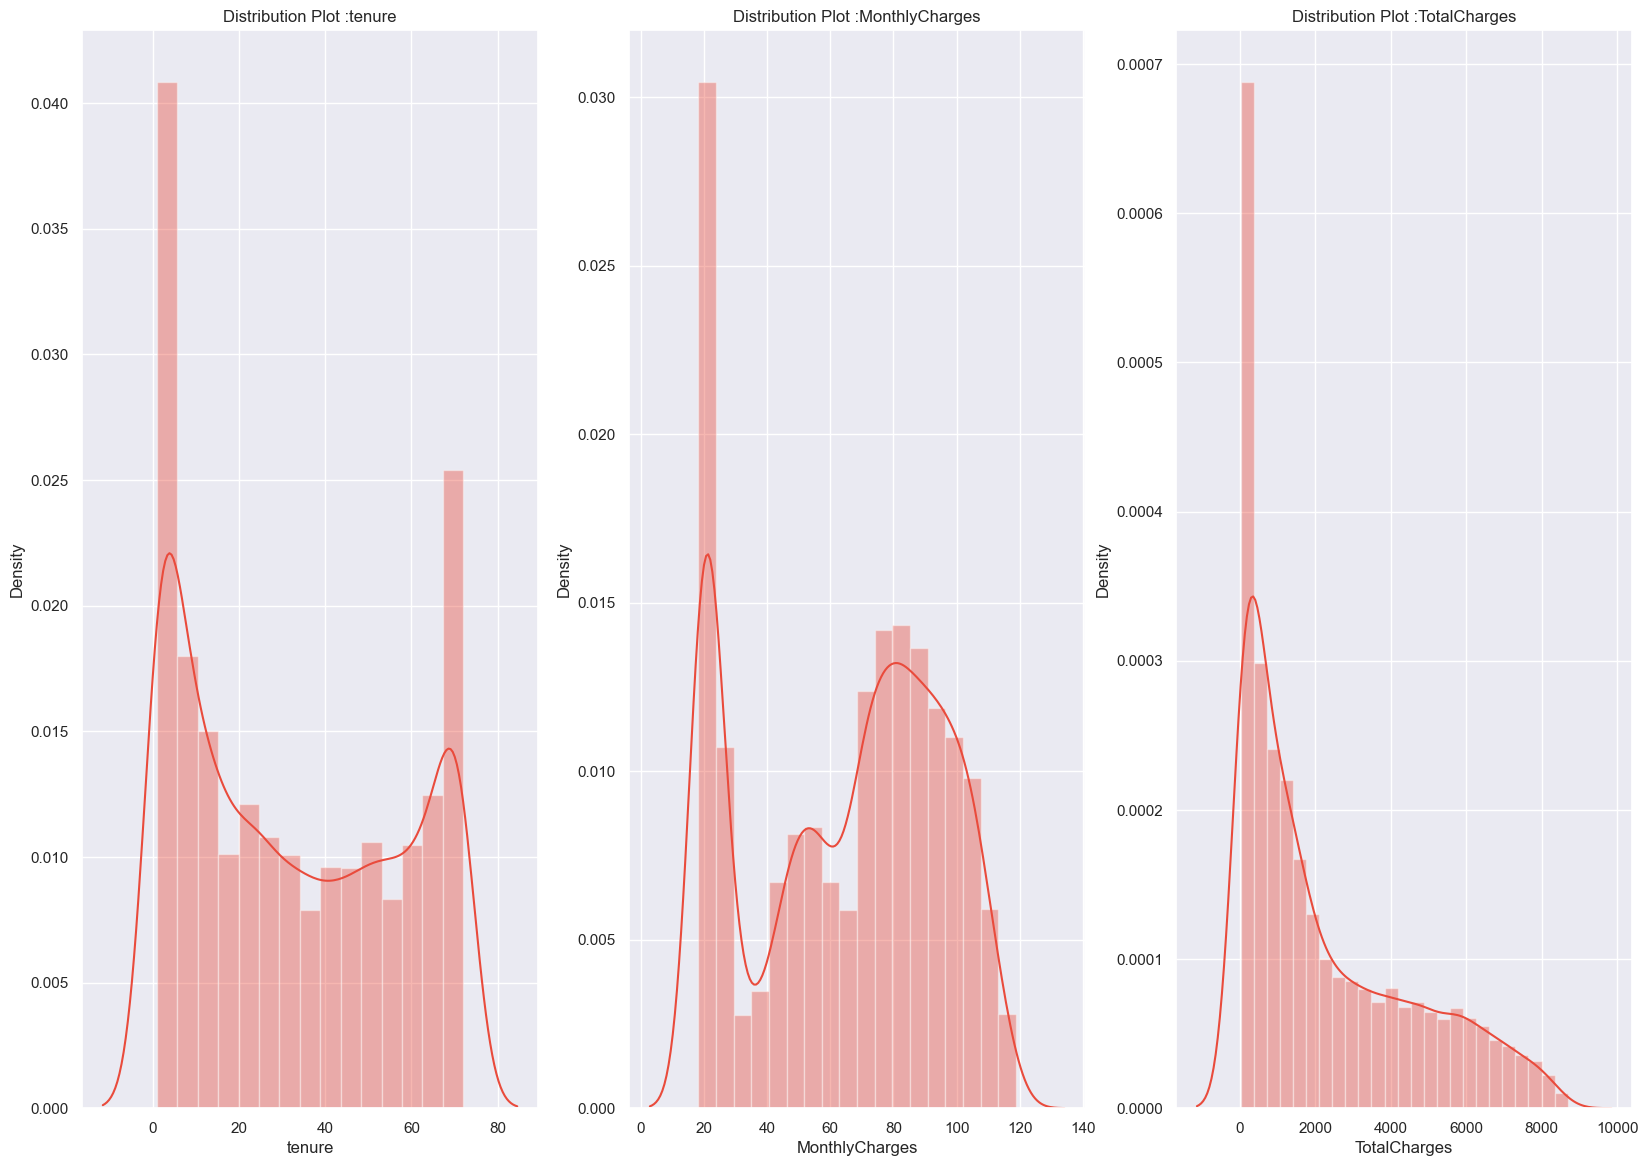

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color= colors[0])
    title = 'Distribution Plot :' + numerical_features[i]
    plt.title(title)
plt.show()

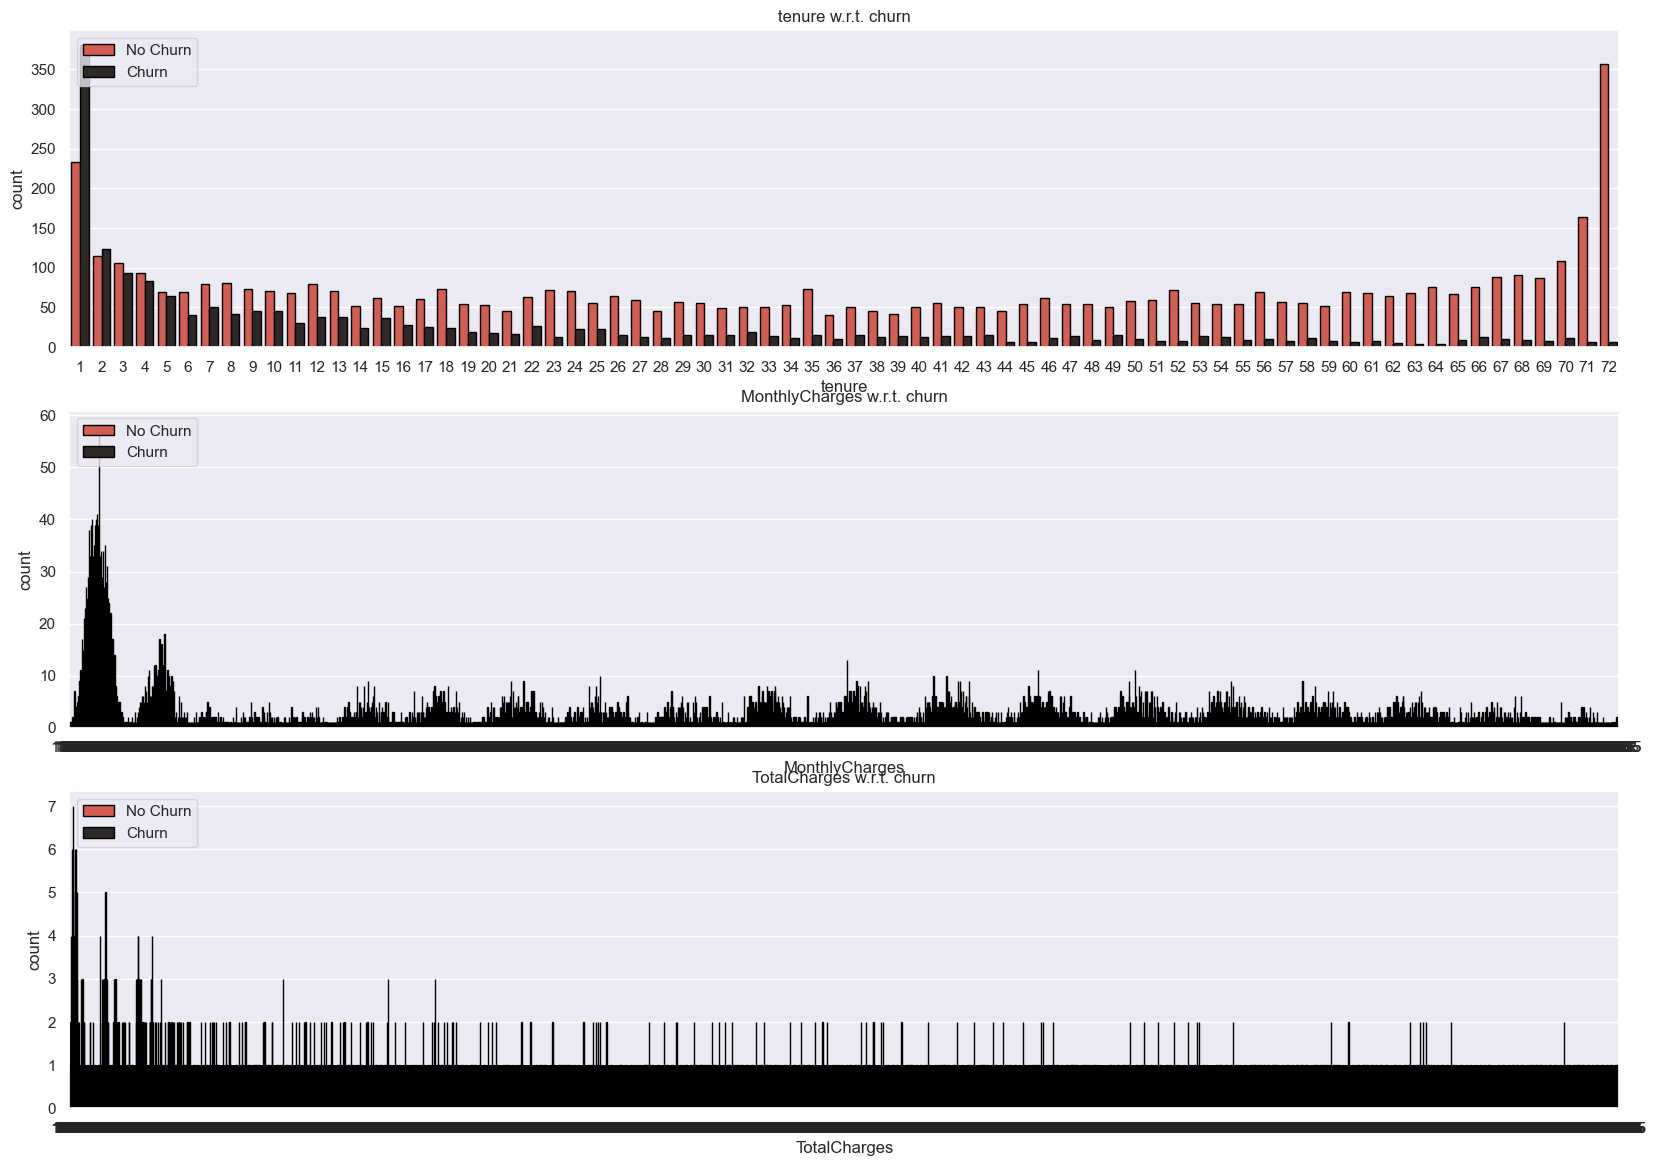

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(3,1, i+1)
    sns.countplot(x = numerical_features[i], data=df1, hue='Churn',
    palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[i] + ' w.r.t. churn'
    plt.title(title)
plt.show()

In [38]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po

In [39]:
df1.groupby('tenure').Churn.mean()

tenure
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 72, dtype: float64

In [40]:
tenure_chunk = df1.groupby('tenure').Churn.mean().reset_index()

In [41]:
fig = go.Figure(data=[go.Scatter(x = tenure_chunk['tenure'], 
                                 y = tenure_chunk['Churn'], mode = 'markers',
                                 name='Low', marker = dict(size=5, 
                                                           line=dict(width=0.8),
                                                           color='blue'),)])

fig.update_layout(title = "Churn rate by Tenure", xaxis_title = "Tenure",
                  yaxis_title="Churn Rate", template = "plotly_dark")
fig.show()

In [42]:
# ['tenure', 'MonthlyCharges', 'TotalCharges']
# Feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = scaler.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = scaler.fit_transform(df1[['TotalCharges']])
df1.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.161694     -0.994194      0  
1                 0              3       -0.260878     -0.173740      0  
2                 1              3       -0.363923     -0.959649      1  
3                 0              0       -0.747850     -0.195248      0  
4                 1              2        0.196178     -0.940457      1

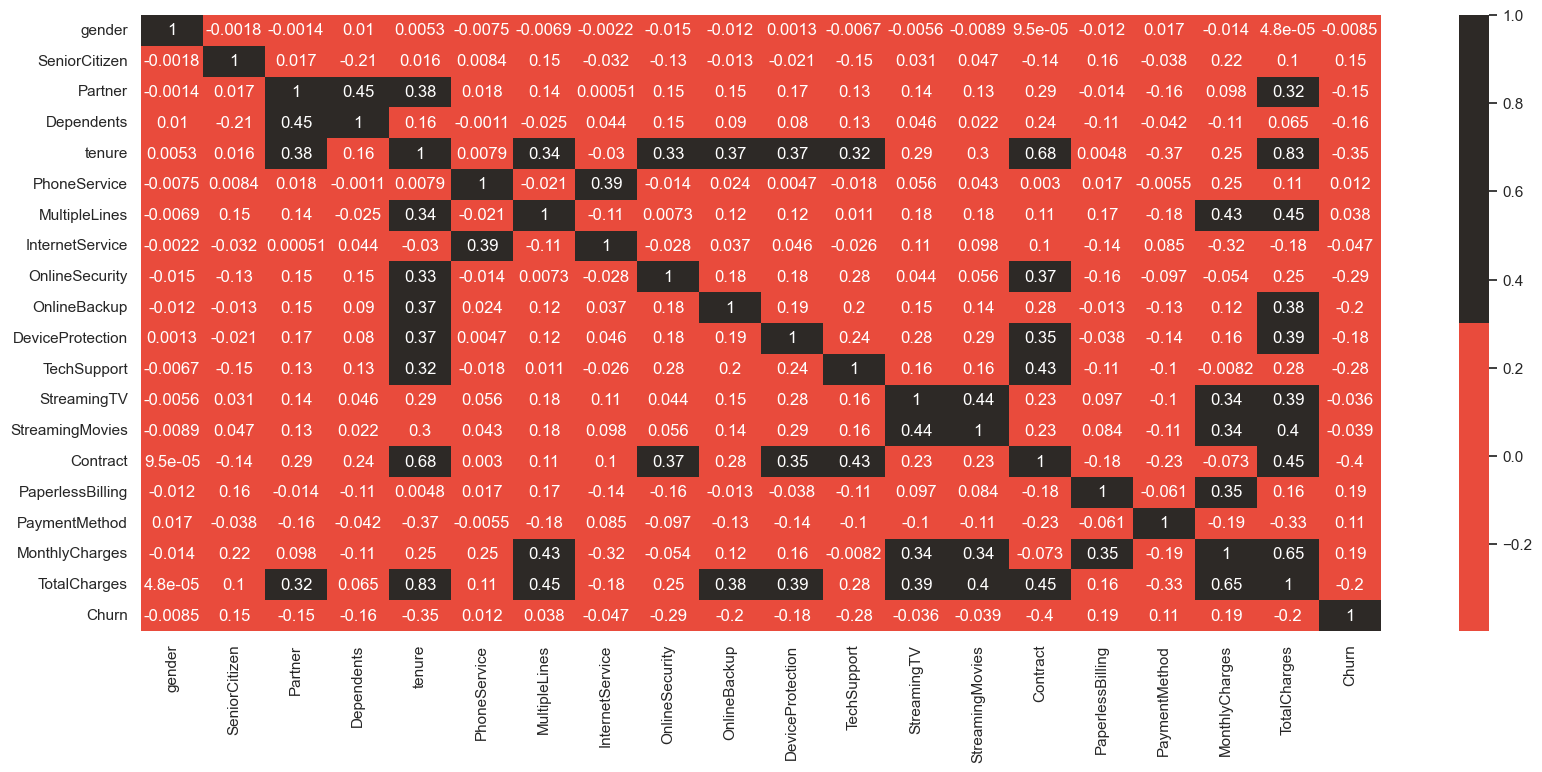

In [43]:
# Correlation part :

plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), cmap=colors, annot=True);

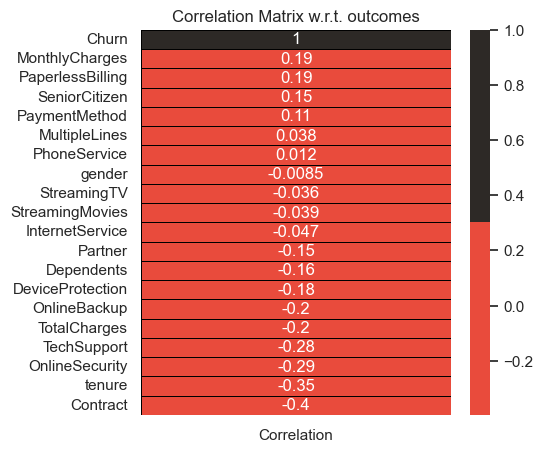

In [44]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [45]:
# categorical_features - chi-square test
# numerical_features  - Anova test

In [46]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [47]:
df1.head(1)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.161694     -0.994194      0

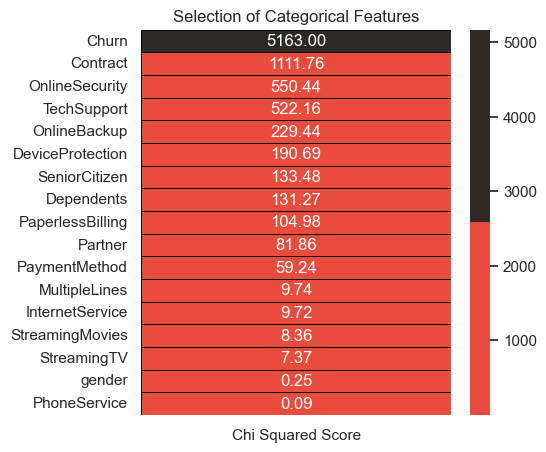

In [48]:
# Chi-Square Test :
features = df1.loc[:,categorical_features] # char
target = df1.loc[:,'Churn'] # cat
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [49]:
from sklearn.feature_selection import f_classif

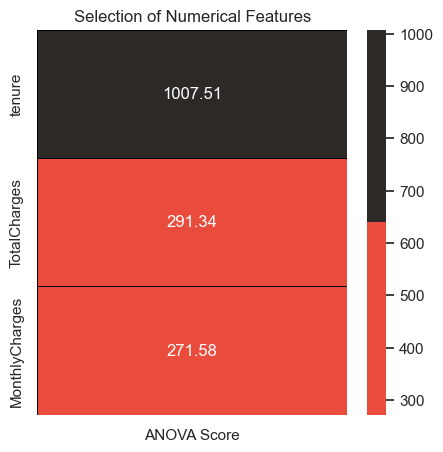

In [50]:
# Anova Testing

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [51]:
# Drop the non-significant variable
df1.drop(columns = ['gender','PhoneService','StreamingTV','StreamingMovies','InternetService','MultipleLines'], inplace=True)
df1.head()

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0 -1.280248               0             2   
1              0        0           0  0.064303               2             0   
2              0        0           0 -1.239504               2             2   
3              0        0           0  0.512486               2             0   
4              0        0           0 -1.239504               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0       -1.161694     -0.994194      0  
1       -0.260878     -0.173740      0  
2       -0.363923     -0.959649      1  
3       -0.747850     -0.195248      0  
4        0.196178     -0.940457      1

In [52]:
df1['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [53]:
# Handling imbalance dataset
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
smote = SMOTE()
f1 = df1.iloc[:,:-1].values
t1 = df1.iloc[:,-1].values
f1, t1 = smote.fit_resample(f1, t1)
print(df1.iloc[:,-1].value_counts())
print(Counter(t1))

0    5163
1    1869
Name: Churn, dtype: int64
Counter({0: 5163, 1: 5163})


In [54]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

In [55]:
!pip install lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [56]:
X_train, X_test, y_train, y_test = train_test_split(f1,t1, test_size=0.2, random_state=101, stratify=t1)

In [57]:
models={"Logisitic Regression":LogisticRegression(),
        "Random Forest":RandomForestClassifier(),
        "Decision Tree":DecisionTreeClassifier(),
        "Adaboost":AdaBoostClassifier(),
        "Gradient Boost":GradientBoostingClassifier(),
        "LGBMClassifier" :LGBMClassifier(),
        "XGBClassifier" :XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7661
- F1 score: 0.7656
- Precision: 0.7439
- Recall: 0.8116
- Roc Auc Score: 0.7661
----------------------------------
Model performance for Test set
- Accuracy: 0.7725
- F1 score: 0.7723
- Precision: 0.7557
- Recall: 0.8054
- Roc Auc Score: 0.7725


Random Forest
Model performance for Training set
- Accuracy: 0.9982
- F1 score: 0.9982
- Precision: 0.9983
- Recall: 0.9981
- Roc Auc Score: 0.9982
----------------------------------
Model performance for Test set
- Accuracy: 0.8485
- F1 score: 0.8485
- Precision: 0.8516
- Recall: 0.8441
- Roc Auc Score: 0.8485


Decision Tree
Model performance for Training set
- Accuracy: 0.9982
- F1 score: 0.9982
- Precision: 0.9995
- Recall: 0.9969
- Roc Auc Score: 0.9982
----------------------------------
Model performance for Test set
- Accuracy: 0.7735
- F1 score: 0.7735
- Precision: 0.7767
- Recall: 0.7677
- Roc Auc Score: 0.7735


Adaboost
Model performance for Training set
- Ac

### Hyper parameter Tuning

In [58]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [59]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [60]:
gb_params = {"loss" :["log_loss", "exponential"],
             "criterion": ["friedman_mse", "squared_error"],
             "max_depth": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000],
             "max_features" :["sqrt", "log2"]}

In [61]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("GB", GradientBoostingClassifier(), gb_params)
                   
                   ]

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
cv = StratifiedKFold()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=cv,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 15}
---------------- Best Params for GB -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 8, 'loss': 'exponential', 'criterion': 'squared_error'}


In [66]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features='auto',max_depth=15),
    "Gradient Boost":GradientBoostingClassifier(n_estimators=100,min_samples_split= 2,max_features='log2',max_depth=8,loss='exponential',
                                               criterion='squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9671
- F1 score: 0.9670
- Precision: 0.9416
- Recall: 0.9959
- Roc Auc Score: 0.9671
----------------------------------
Model performance for Test set
- Accuracy: 0.8461
- F1 score: 0.8461
- Precision: 0.8395
- Recall: 0.8558
- Roc Auc Score: 0.8461


Gradient Boost
Model performance for Training set
- Accuracy: 0.9367
- F1 score: 0.9367
- Precision: 0.9197
- Recall: 0.9569
- Roc Auc Score: 0.9367
----------------------------------
Model performance for Test set
- Accuracy: 0.8398
- F1 score: 0.8398
- Precision: 0.8482
- Recall: 0.8277
- Roc Auc Score: 0.8398




### Sclaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
X_train_scaled =sc.fit_transform(X_train)
X_test_scaled =sc.transform(X_test)

In [69]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features='auto',max_depth=15),
    "Gradient Boost":GradientBoostingClassifier(n_estimators=100,min_samples_split= 2,max_features='log2',max_depth=8,loss='exponential',
                                               criterion='squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9676
- F1 score: 0.9675
- Precision: 0.9427
- Recall: 0.9956
- Roc Auc Score: 0.9676
----------------------------------
Model performance for Test set
- Accuracy: 0.8451
- F1 score: 0.8451
- Precision: 0.8366
- Recall: 0.8577
- Roc Auc Score: 0.8451


Gradient Boost
Model performance for Training set
- Accuracy: 0.9408
- F1 score: 0.9408
- Precision: 0.9225
- Recall: 0.9625
- Roc Auc Score: 0.9408
----------------------------------
Model performance for Test set
- Accuracy: 0.8393
- F1 score: 0.8393
- Precision: 0.8433
- Recall: 0.8335
- Roc Auc Score: 0.8393




## DNN

In [71]:
import tensorflow as tf
from tensorflow import keras


In [102]:
model = keras.Sequential([
    keras.layers.Dense(100,activation = 'relu',input_shape =(13,) ),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [103]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
## Early stopping : stop training when a monitored metric has stopped improving.

from keras.callbacks import EarlyStopping

In [106]:


early_stopping = EarlyStopping(monitor ='val_loss',min_delta = 0.01,patience = 50,verbose = 1,mode = 'auto',baseline = None,restore_best_weights = False,start_from_epoch = 0)

In [107]:
X_train_scaled.shape

(8260, 13)

In [108]:
X_test_scaled[0].shape

(13,)

In [110]:
history = model.fit(X_train_scaled, y_train,epochs = 1000,validation_data = (X_test_scaled,y_test) ,callbacks = early_stopping)

Epoch 1/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3545 - val_accuracy: 0.8083 - val_loss: 0.4277
Epoch 2/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3609 - val_accuracy: 0.8045 - val_loss: 0.4273
Epoch 3/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.3477 - val_accuracy: 0.8127 - val_loss: 0.4242
Epoch 4/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3577 - val_accuracy: 0.8078 - val_loss: 0.4223
Epoch 5/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8461 - loss: 0.3511 - val_accuracy: 0.8083 - val_loss: 0.4246
Epoch 6/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.3595 - val_accuracy: 0.8074 - val_loss: 0.4244
Epoch 7/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8547 - loss: 0.3447 - val_accuracy: 0.8025 - val_loss: 0.4249
Epoch 8/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3483 - 

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3292 - val_accuracy: 0.8107 - val_loss: 0.4295
Epoch 51/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.3252 - val_accuracy: 0.8107 - val_loss: 0.4244
Epoch 52/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.3316 - val_accuracy: 0.8093 - val_loss: 0.4236
Epoch 53/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3222 - val_accuracy: 0.8117 - val_loss: 0.4242
Epoch 54/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3333 - val_accuracy: 0.8146 - val_loss: 0.4356
Epoch 55/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3293 - val_accuracy: 0.8156 - val_loss: 0.4248
Epoch 56/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3321 - val_accuracy: 0.8069 - val_loss: 0.4288
Epoch 57/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3290 - val_ac

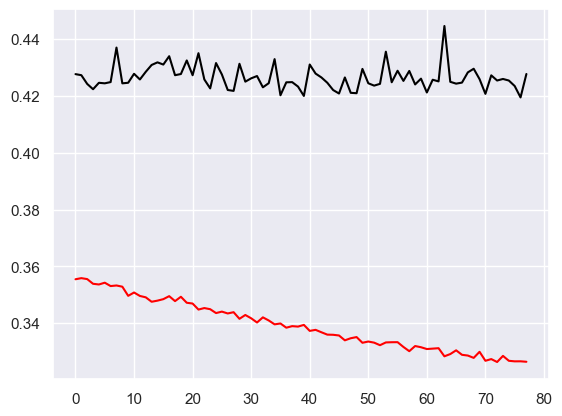

In [111]:
## plot

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'black')

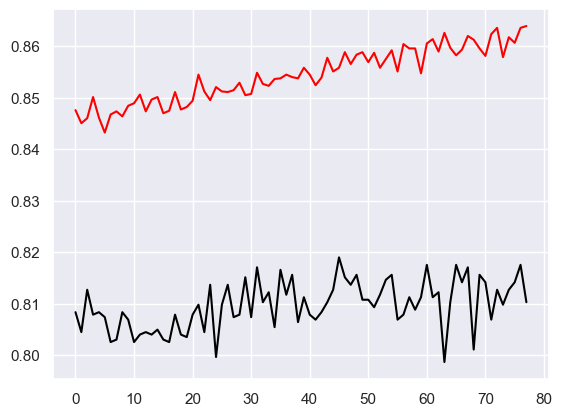

In [112]:
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'black')